In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pf

In [79]:
df = pd.read_csv("Dataset/all_stocks_5yr.csv")
df["date"] = pd.to_datetime(df['date'])
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [81]:
df_apple = df[df["Name"] == "AAPL"]
df_apple.index = df_apple["date"]
df_google = df[df["Name"] == "GOOGL"]
df_google.index = df_google["date"]
df_fb = df[df["Name"] == "FB"]
df_fb.index = df_fb["date"]
df_amazon = df[df["Name"] == "AMZN"]
df_amazon.index = df_amazon["date"]
company_list = [df_apple, df_google, df_fb, df_amazon]
comapny_name = ["APPLE", "GOOGLE", "FACEBOOK", "AMAZON"]

In [82]:
big_4 = pd.concat([df_apple, df_google, df_fb, df_amazon], axis = 0)
big_4.head()

,date,open,high,low,close,volume,Name
date,,,,,,,
2013-02-08,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [152]:
pf.ProfileReport(big_4.drop(["date"], axis = 1))

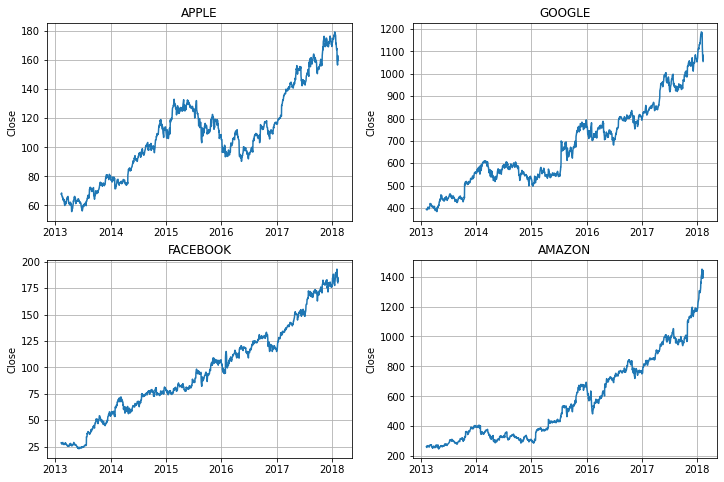

In [83]:
# plot of big_4 close prices

plt.figure(figsize=(12, 8))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company["close"])
    plt.ylabel('Close')
    plt.xlabel(None)
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()

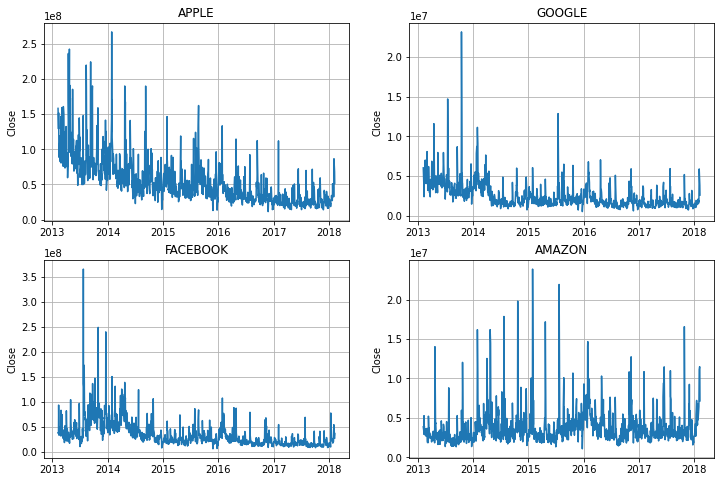

In [84]:
# plot of big_4 close stock volume

plt.figure(figsize=(12, 8))
#plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['date'], company["volume"])
    plt.ylabel('Close')
    plt.xlabel(None)
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Name
AAPL     [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
AMZN     [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
FB       [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
GOOGL    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

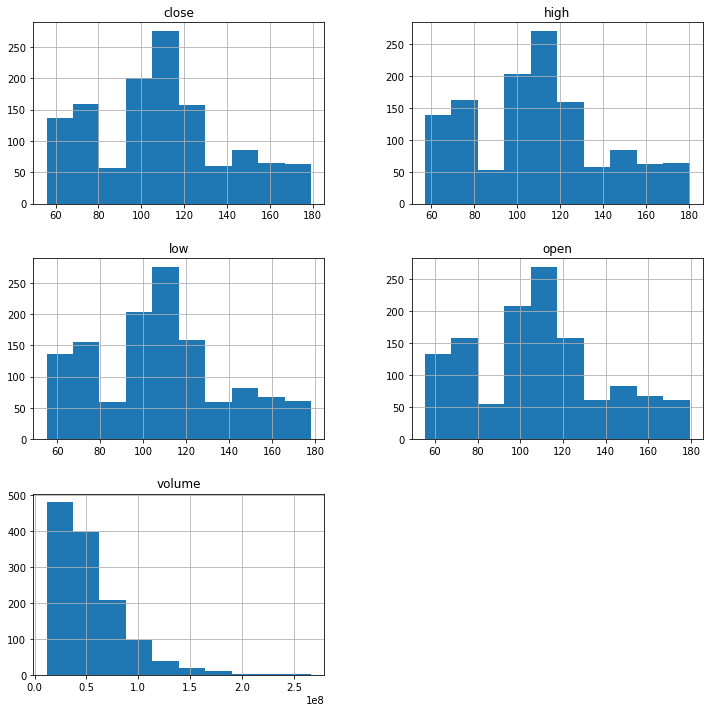

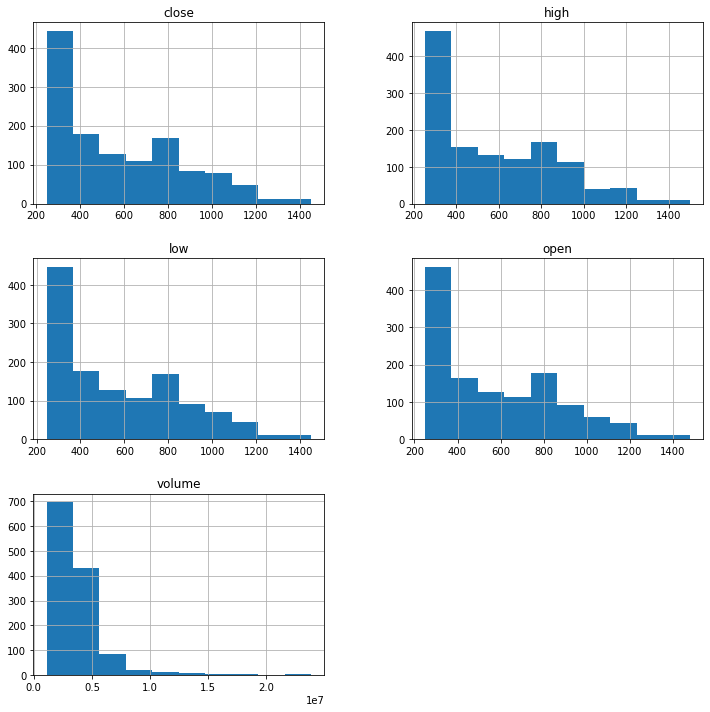

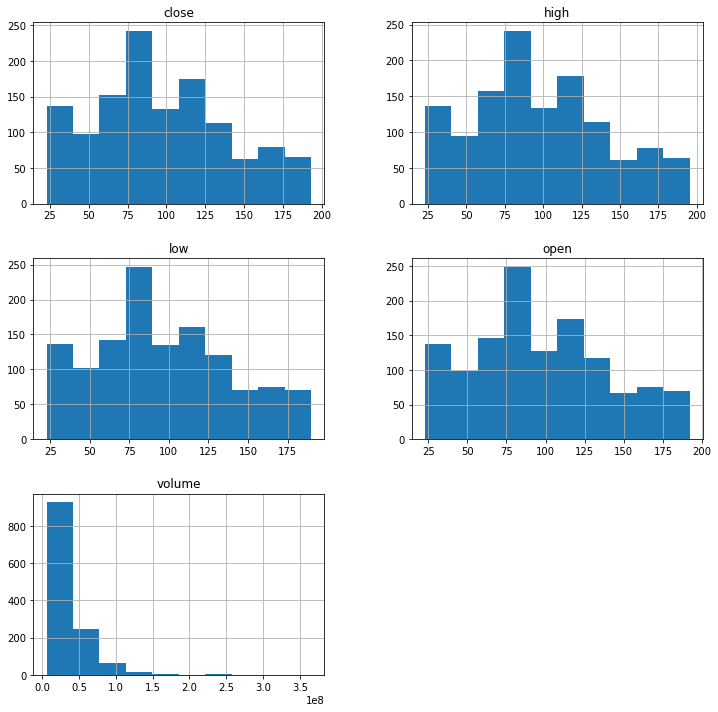

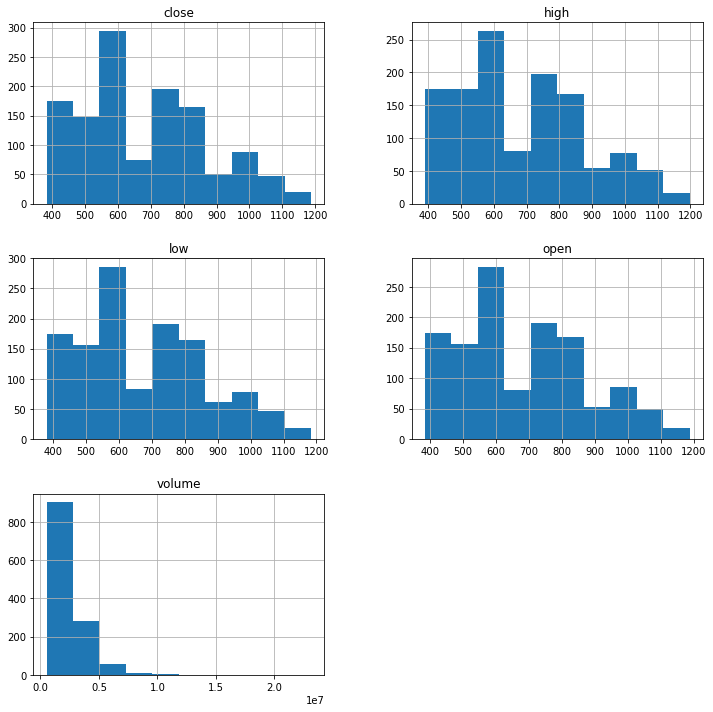

In [85]:
# what are the moving averages for each company stock

moving_average = [10, 20, 50]

for ma in moving_average:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        
        
big_4.groupby("Name").hist(figsize = (12, 12))

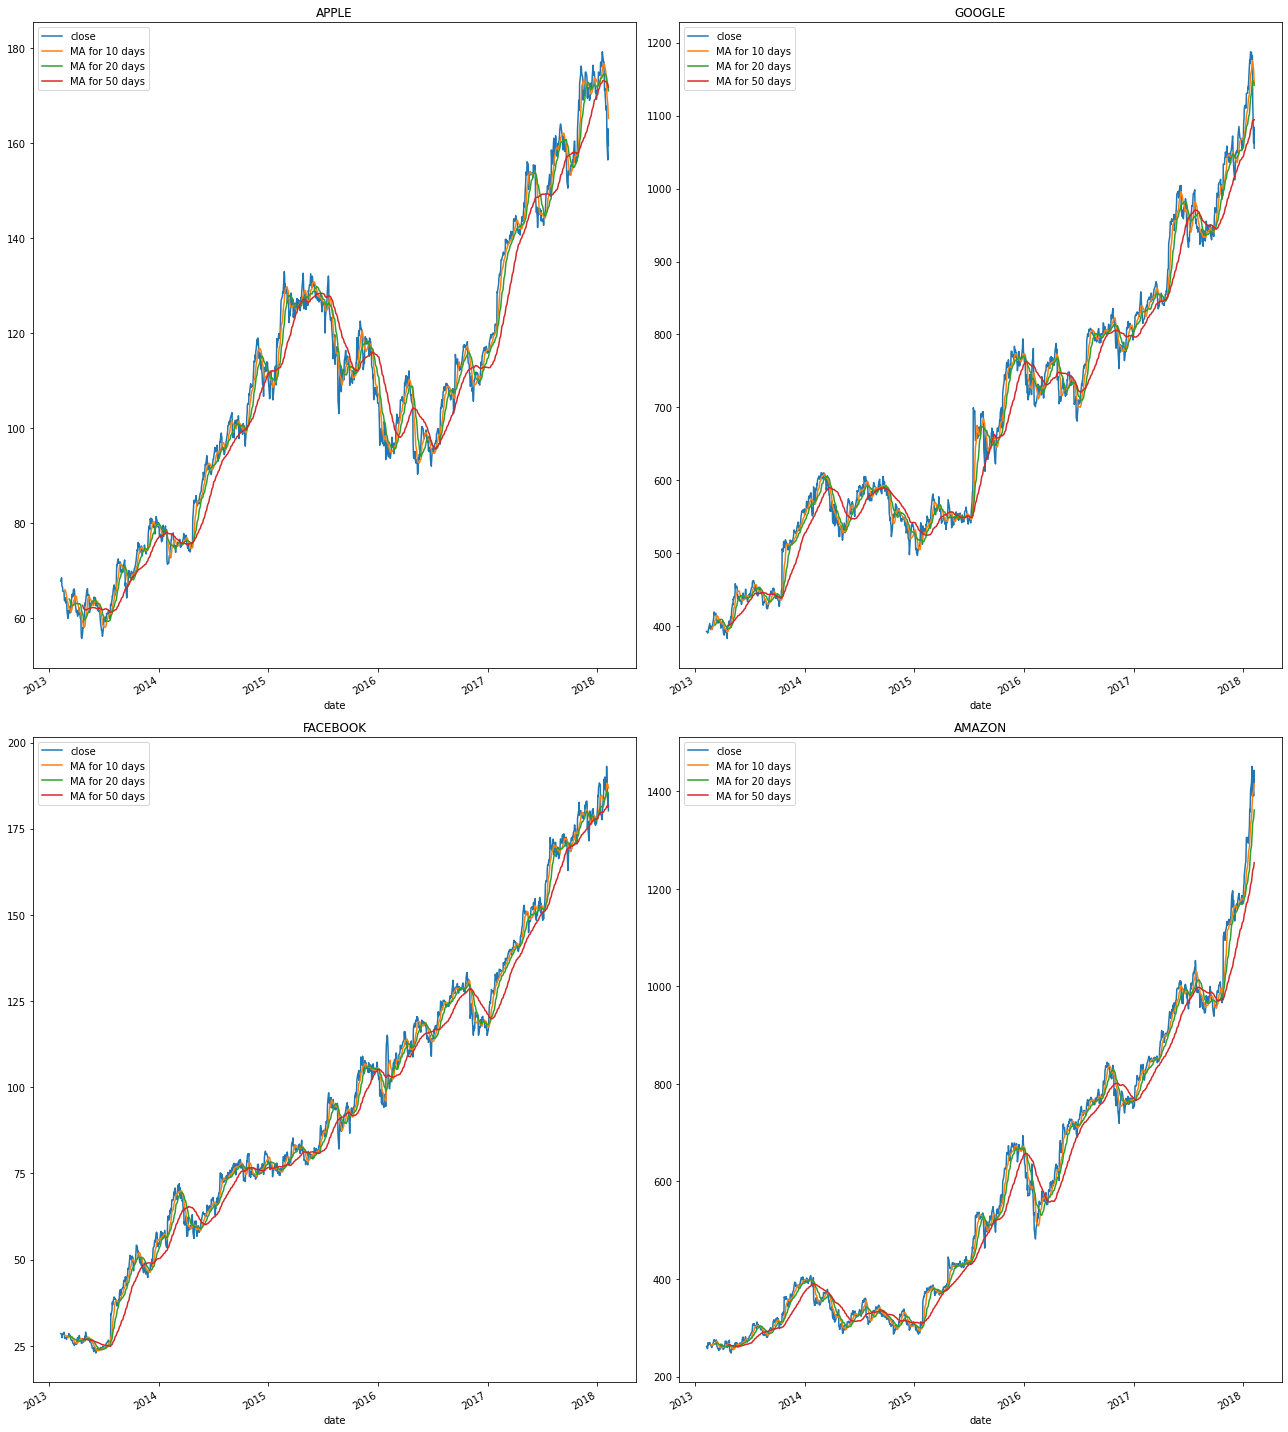

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(18)

df_apple[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

df_google[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

df_fb[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('FACEBOOK')

df_amazon[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


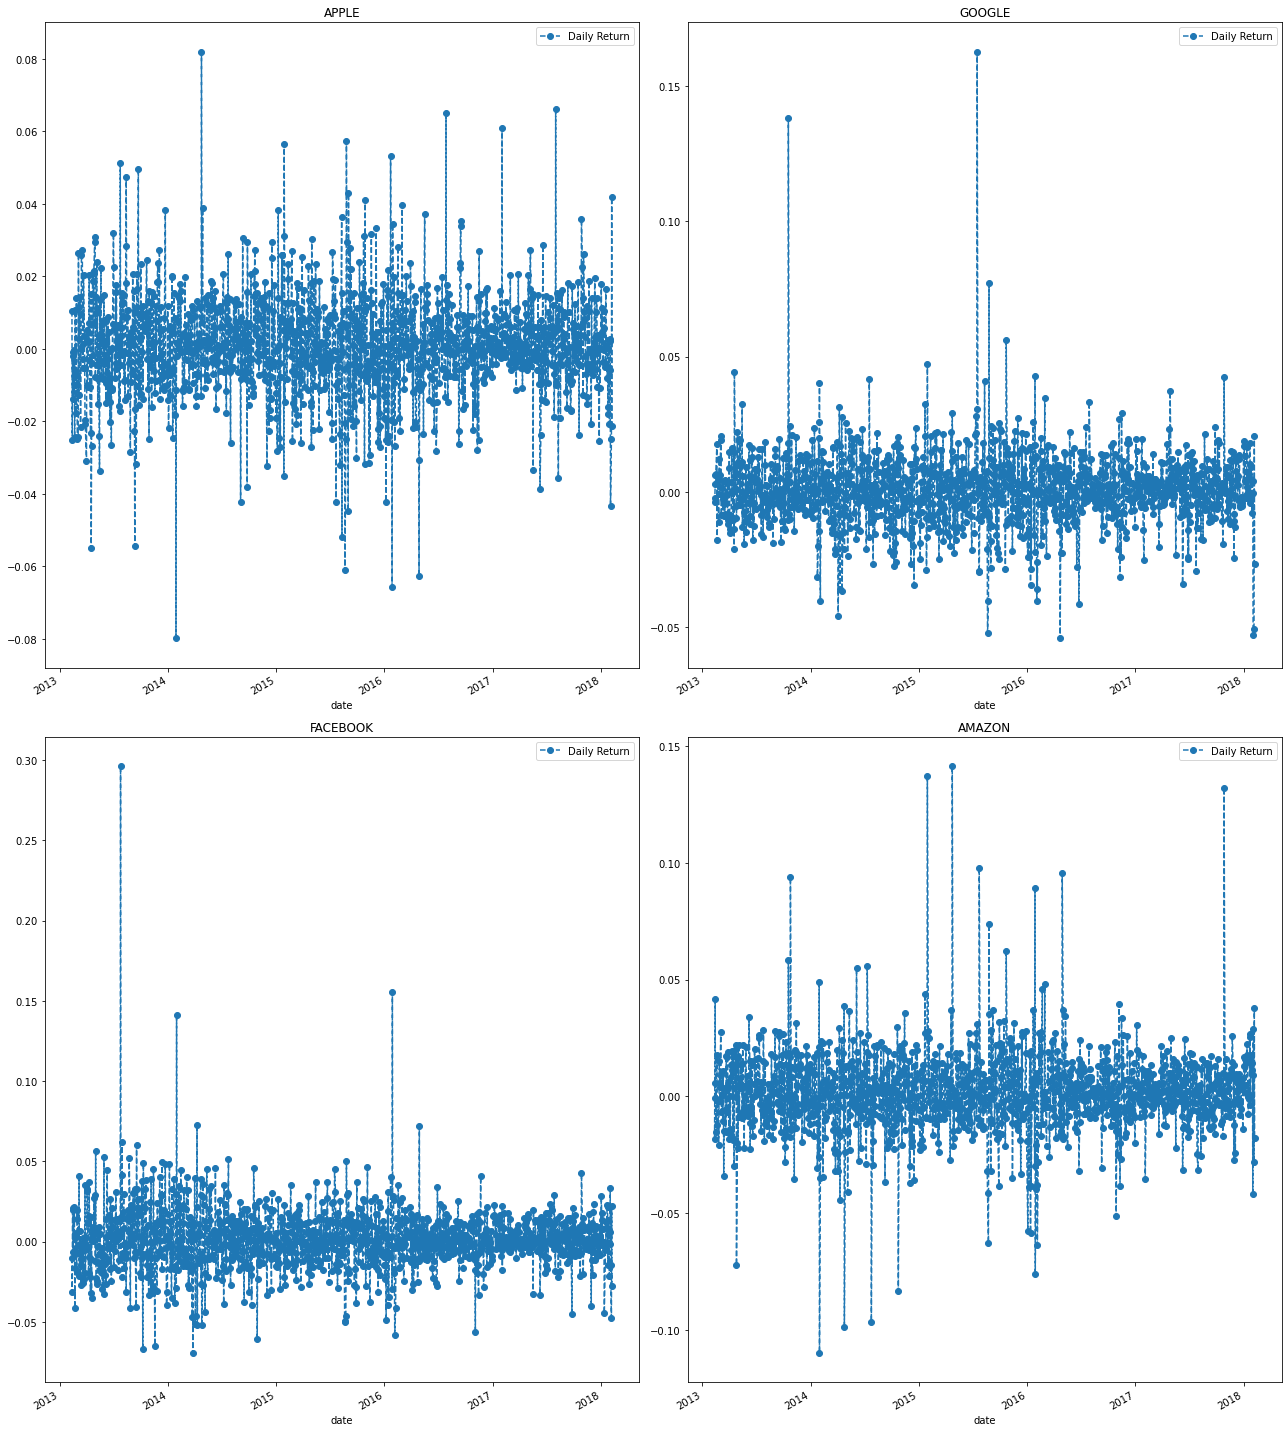

In [87]:
# We will analyze the rik of these companies stock
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()
    
    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(18)

df_apple['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

df_google['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

df_fb['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('FACEBOOK')

df_amazon['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

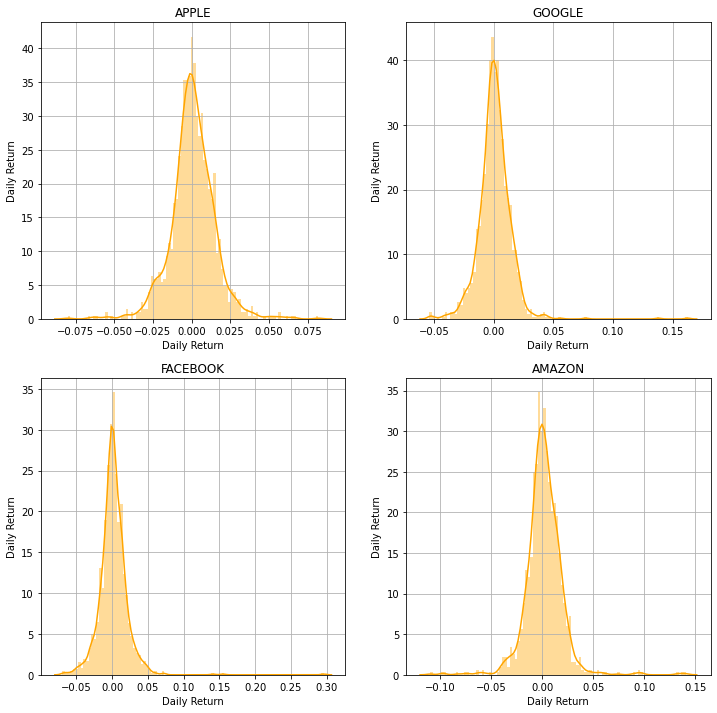

In [90]:
import seaborn as sns

plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='orange')
    plt.ylabel('Daily Return')
    if i == 1:
        plt.title(f"APPLE")
    elif i == 2:
        plt.title(f"GOOGLE")
    elif i == 3:
        plt.title(f"FACEBOOK")
    else:
        plt.title(f"AMAZON")
    plt.grid()


In [96]:
# Predicting Stock prices with LSTM


data_apple = df_apple.filter(["close"])
data_apple = data_apple.values

train_len = int(np.ceil(len(data_apple) * .8))
train_len

1008

In [100]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range = (0, 1))
scale_data_apple = scale.fit_transform(data_apple)

train_data_apple = scale_data_apple[0:int(train_len), :]

X_train = []
y_train = []


for i in range(60, len(train_data_apple)):
    X_train.append(train_data_apple[i-60:i, 0])
    y_train.append(train_data_apple[i, 0])
    if i<=61:
        print(X_train)
        print(y_train)
        print()
        
        
X_train, y_train = np.array(X_train), np.array(y_train)

[array([0.0977103 , 0.103438  , 0.08951884, 0.08848863, 0.08800268,
       0.08056363, 0.08036683, 0.06747788, 0.06424956, 0.06974563,
       0.0604778 , 0.06761637, 0.06252526, 0.05885797, 0.046212  ,
       0.03415564, 0.04699113, 0.04064871, 0.04634158, 0.04765769,
       0.05477358, 0.0438511 , 0.04375877, 0.04856074, 0.06147237,
       0.07542636, 0.07400334, 0.07121481, 0.07196641, 0.08258842,
       0.08452006, 0.08169265, 0.07121481, 0.06031582, 0.0444067 ,
       0.04542719, 0.04797032, 0.04302985, 0.03780024, 0.04128287,
       0.04217377, 0.05225152, 0.05067786, 0.0454361 , 0.033924  ,
       0.0413177 , 0.01419696, 0.00175913, 0.        , 0.00941847,
       0.01804971, 0.01727706, 0.02065277, 0.03086415, 0.04580704,
       0.06045431, 0.0564169 , 0.06362512, 0.06878507, 0.08119942])]
[0.0788255618161805]

[array([0.0977103 , 0.103438  , 0.08951884, 0.08848863, 0.08800268,
       0.08056363, 0.08036683, 0.06747788, 0.06424956, 0.06974563,
       0.0604778 , 0.06761637, 0.062

In [101]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(948, 60, 1)

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer = "adam", loss = "mean_squared_error")

In [145]:
model.fit(X_train, y_train, batch_size = 1, epochs = 25)

Epoch 1/25
948/948 [==============================] - 5s 5ms/step - loss: 2.2382e-04
Epoch 2/25
948/948 [==============================] - 5s 5ms/step - loss: 2.2387e-04
Epoch 3/25
948/948 [==============================] - 5s 5ms/step - loss: 2.2150e-04
Epoch 4/25
948/948 [==============================] - 5s 5ms/step - loss: 2.1488e-04
Epoch 5/25
948/948 [==============================] - 5s 5ms/step - loss: 2.3081e-04
Epoch 6/25
948/948 [==============================] - 5s 5ms/step - loss: 2.1898e-04
Epoch 7/25
948/948 [==============================] - 5s 5ms/step - loss: 2.1934e-04
Epoch 8/25
948/948 [==============================] - 5s 5ms/step - loss: 2.2313e-04
Epoch 9/25
948/948 [==============================] - 5s 5ms/step - loss: 2.0155e-04
Epoch 10/25
948/948 [==============================] - 5s 5ms/step - loss: 2.3278e-04
Epoch 11/25
948/948 [==============================] - 5s 5ms/step - loss: 2.0486e-04
Epoch 12/25
948/948 [==============================] - 5s 5ms/s

In [146]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scale_data_apple[train_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = data_apple[train_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [147]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scale.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.7770261660050153

C:\Users\ajayi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


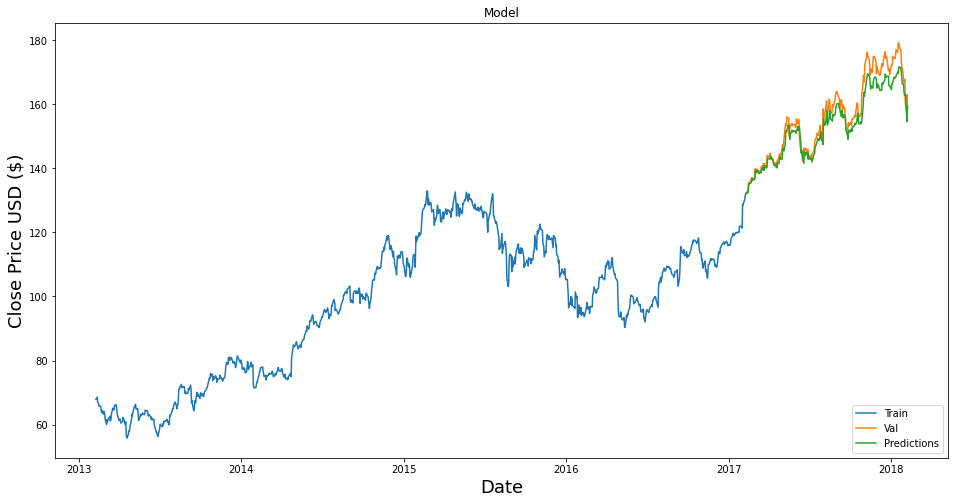

In [148]:
# Plot the data
train = df_apple[:train_len]
valid = df_apple[train_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [149]:
valid[['close', 'Predictions']]

,close,Predictions
date,,
2017-02-09,132.42,132.152161
2017-02-10,132.12,132.513107
2017-02-13,133.29,132.215271
2017-02-14,135.02,133.340057
2017-02-15,135.51,134.956863
...,...,...
2018-02-01,167.78,163.016068
2018-02-02,160.50,163.175049
2018-02-05,156.49,157.961792
